## ADHD-2025 

**Author: Anni, Casey** <br/>
**Date: v1- 11/02/2025**

### 1. Define the problem 

### 2. Load the datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Plot style
sns.set(style="whitegrid")


Load the training dataset - both the categorical and quantitative data

In [3]:
# path
categorical_file = "G:/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx"
quantitative_file = "G:/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"

# load Excel 
categorical_df = pd.read_excel(categorical_file)
quantitative_df = pd.read_excel(quantitative_file) 


### 3. Data Exploration

#### 3.1 EDA

In [28]:
# dimensions
print(categorical_df.shape)
print(quantitative_df.shape)


(1213, 10)
(1213, 19)


In [29]:
# information
print(categorical_df.info())
print(quantitative_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   basic_demos_enroll_year           1213 non-null   int64  
 2   basic_demos_study_site            1213 non-null   int64  
 3   preint_demos_fam_child_ethnicity  1202 non-null   float64
 4   preint_demos_fam_child_race       1213 non-null   int64  
 5   mri_track_scan_location           1213 non-null   int64  
 6   barratt_barratt_p1_edu            1213 non-null   int64  
 7   barratt_barratt_p1_occ            1213 non-null   int64  
 8   barratt_barratt_p2_edu            1213 non-null   int64  
 9   barratt_barratt_p2_occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 

In [30]:
# 这是cha老师写的，最好改一下

def highlight_extremes(val, min_val, max_val):
    """
    在 DataFrame 中高亮最大值、最小值和缺失值
    """
    if val == min_val:
        return "background-color: lightblue"
    elif val == max_val:
        return "background-color: lightcoral"
    elif pd.isnull(val):
        return "background-color: yellow"
    return ""

def style_summary_table(df):
    """
    对描述性统计表格进行梯度颜色格式化
    """
    summary = df.describe().T
    summary["Missing_Values"] = df.isnull().sum()

    # 计算全局最小值和最大值
    quant_min = summary["min"].min()
    quant_max = summary["max"].max()

    return summary.style.applymap(lambda x: highlight_extremes(x, quant_min, quant_max))



In [33]:
# 调用函数格式化 DataFrame
styled_summary = style_summary_table(quantitative_df)
styled_summary  # 直接在 Jupyter Notebook 显示


C:\Users\z、\AppData\Local\Temp\ipykernel_27440\2970720225.py:37: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return summary.style.applymap(lambda x: highlight_extremes(x, quant_min, quant_max))


,count,mean,std,min,25%,50%,75%,max,Missing_Values
EHQ_EHQ_Total,1213.000000,58.876917,49.855501,-100.000000,45.600000,76.670000,93.400000,100.000000,0
ColorVision_CV_Score,1213.000000,13.164880,2.780624,0.000000,14.000000,14.000000,14.000000,14.000000,0
APQ_P_APQ_P_CP,1213.000000,3.781533,1.376700,0.000000,3.000000,3.000000,4.000000,12.000000,0
APQ_P_APQ_P_ID,1213.000000,13.205276,3.811772,0.000000,11.000000,13.000000,16.000000,28.000000,0
APQ_P_APQ_P_INV,1213.000000,39.374279,6.245928,0.000000,36.000000,40.000000,43.000000,50.000000,0
APQ_P_APQ_P_OPD,1213.000000,17.785655,3.764112,0.000000,16.000000,18.000000,20.000000,28.000000,0
APQ_P_APQ_P_PM,1213.000000,16.393240,5.376994,0.000000,13.000000,16.000000,19.000000,37.000000,0
APQ_P_APQ_P_PP,1213.000000,25.246496,3.950529,0.000000,23.000000,26.000000,28.000000,30.000000,0
SDQ_SDQ_Conduct_Problems,1213.000000,2.059357,2.023322,0.000000,0.000000,2.000000,3.000000,10.000000,0
SDQ_SDQ_Difficulties_Total,1213.000000,12.122836,6.577207,0.000000,7.000000,12.000000,17.000000,34.000000,0


***决策：下一节进行插补Action: Impute "MRI_Track_Age_at_Scan"***

In [34]:
# 调用函数格式化 DataFrame
styled_summary = style_summary_table(categorical_df)
styled_summary  # 直接在 Jupyter Notebook 显示


C:\Users\z、\AppData\Local\Temp\ipykernel_27440\2970720225.py:37: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return summary.style.applymap(lambda x: highlight_extremes(x, quant_min, quant_max))


,count,mean,std,min,25%,50%,75%,max,Missing_Values
basic_demos_enroll_year,1213.000000,2017.652102,1.122522,2015.000000,2017.000000,2018.000000,2019.000000,2020.000000,0
basic_demos_study_site,1213.000000,2.014839,1.135147,1.000000,1.000000,1.000000,3.000000,4.000000,0
preint_demos_fam_child_ethnicity,1202.000000,0.424293,0.687470,0.000000,0.000000,0.000000,1.000000,3.000000,11
preint_demos_fam_child_race,1213.000000,2.080791,3.164636,0.000000,0.000000,0.000000,2.000000,11.000000,0
mri_track_scan_location,1213.000000,2.288541,0.758348,0.000000,2.000000,2.000000,3.000000,4.000000,0
barratt_barratt_p1_edu,1213.000000,17.641385,4.004639,0.000000,15.000000,18.000000,21.000000,21.000000,0
barratt_barratt_p1_occ,1213.000000,24.892828,17.025899,0.000000,0.000000,30.000000,40.000000,45.000000,0
barratt_barratt_p2_edu,1213.000000,14.122012,7.201023,0.000000,12.000000,18.000000,21.000000,21.000000,0
barratt_barratt_p2_occ,1213.000000,24.719703,17.171113,0.000000,5.000000,30.000000,40.000000,45.000000,0


***决策：下一节删除preint_demos_fam_child_ethnicity的缺失11行***

#### 3.2 Plots

In [4]:
# basic statistical information
categorical_summary = categorical_df.nunique().to_frame("Unique_Values")
categorical_summary["Missing_Values"] = categorical_df.isnull().sum()
categorical_summary["Data_Type"] = categorical_df.dtypes

quantitative_summary = quantitative_df.describe().T
quantitative_summary["Missing_Values"] = quantitative_df.isnull().sum()
quantitative_summary["Data_Type"] = quantitative_df.dtypes


In [5]:
# 计算最小值和最大值
quantitative_min = quantitative_summary["min"].min()
quantitative_max = quantitative_summary["max"].max()



In [35]:
# 生成梯度色表
def highlight_extremes(val, min_val, max_val):
    if val == min_val:
        return "background-color: lightblue"
    elif val == max_val:
        return "background-color: lightcoral"
    elif pd.isnull(val):
        return "background-color: yellow"
    return 
styled_quant_summary = quantitative_summary.style.applymap(
    lambda x: highlight_extremes(x, quantitative_min, quantitative_max)
)


C:\Users\z、\AppData\Local\Temp\ipykernel_27440\4281378614.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_quant_summary = quantitative_summary.style.applymap(


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

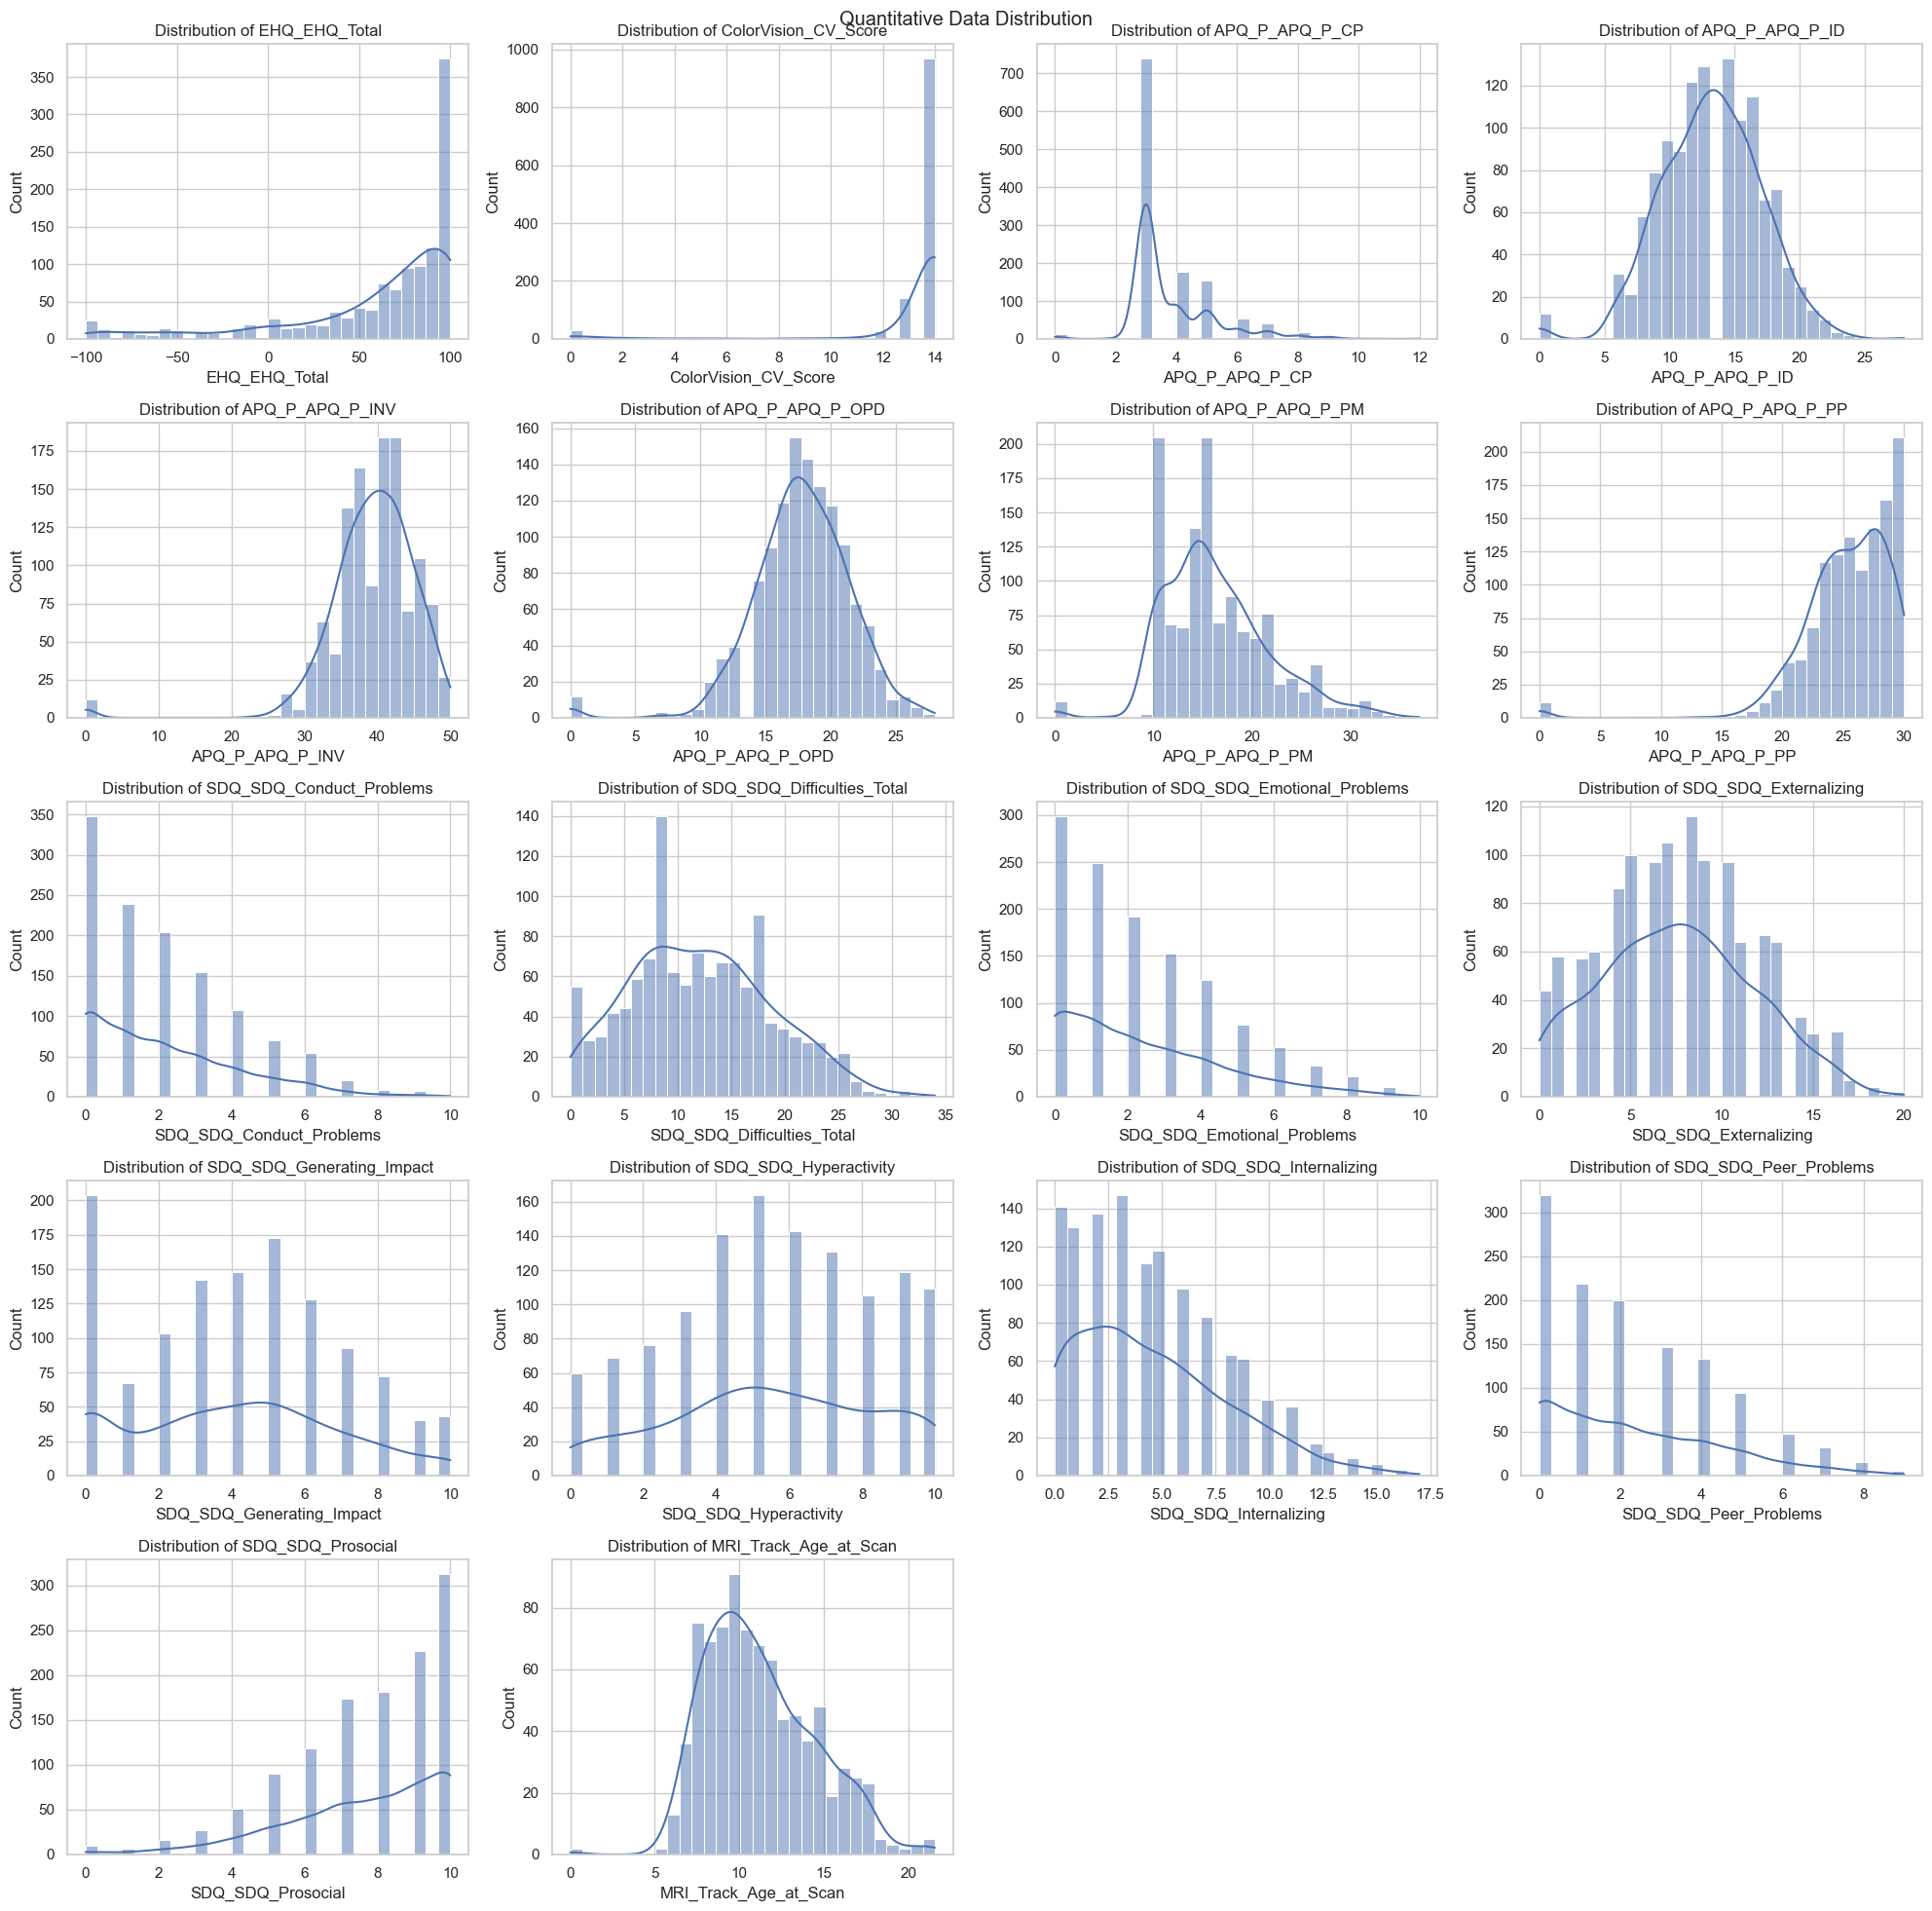

In [12]:
# Quantitative variables distribution
def plot_paginated_histograms(df, columns, title, page_size=20):
    total_vars = len(columns)
    for start in range(0, total_vars, page_size):
        end = min(start + page_size, total_vars)
        cols_subset = columns[start:end]
        rows = (len(cols_subset) // 4) + (1 if len(cols_subset) % 4 != 0 else 0)
        fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 4))
        axes = axes.flatten()
        
        for i, column in enumerate(cols_subset):
            sns.histplot(df[column].dropna(), bins=30, kde=True, ax=axes[i])
            axes[i].set_title(f"Distribution of {column}")
        
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()

plot_paginated_histograms(quantitative_df, quantitative_df.select_dtypes(include=["int64", "float64"]).columns, "Quantitative Data Distribution")


***copy一份，删掉id列，然后画图。保留原data***

In [23]:
# use a copy of categorical_df to plot graphs
categorical_df2 = categorical_df

# 规范列名，去除前后空格，确保列名一致
categorical_df2.columns = categorical_df2.columns.str.strip().str.lower()

# delete the paticipant_id column because we don't need to explore paticipant_id
if "participant_id" in categorical_df2.columns:
    categorical_df2 = categorical_df2.drop(columns=["participant_id"])

In [24]:
categorical_df2.head()

,basic_demos_enroll_year,basic_demos_study_site,preint_demos_fam_child_ethnicity,preint_demos_fam_child_race,mri_track_scan_location,barratt_barratt_p1_edu,barratt_barratt_p1_occ,barratt_barratt_p2_edu,barratt_barratt_p2_occ
0,2016,1,0.0,0,1,21,45,21,45
1,2019,3,1.0,2,3,15,15,0,0
2,2016,1,1.0,8,1,18,40,0,0
3,2018,3,0.0,8,3,15,30,18,0
4,2019,3,0.0,1,3,15,20,0,0


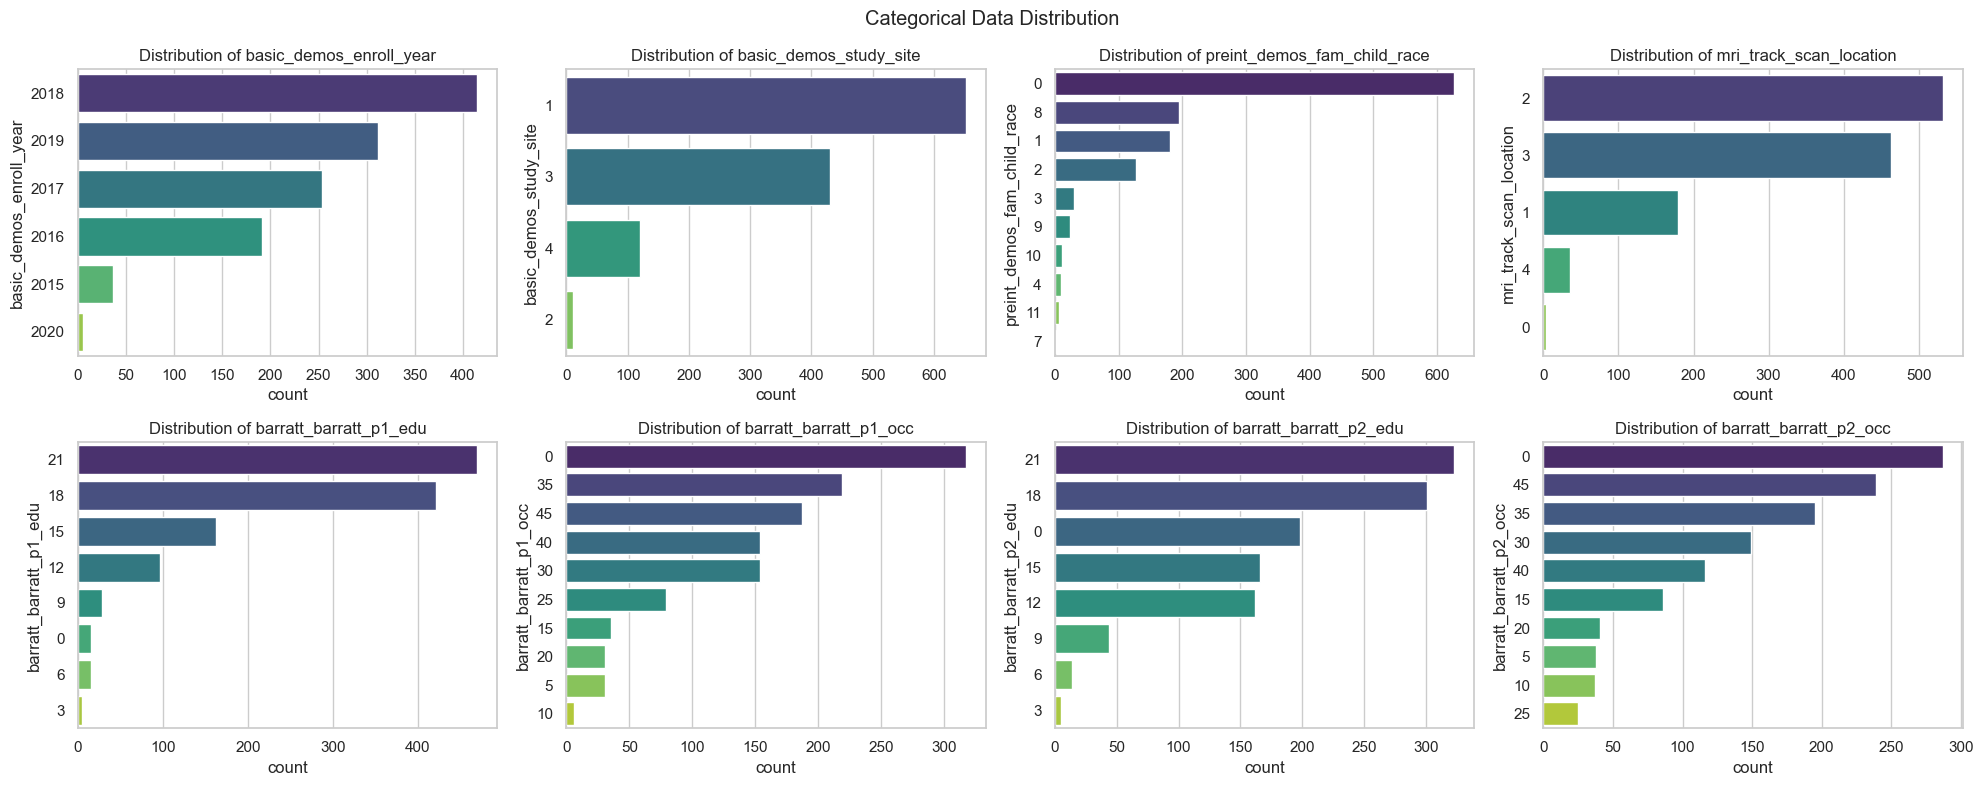

In [25]:
# Categorical variables distribution
def plot_paginated_categorical(df, columns, title, page_size=20):
    total_vars = len(columns)
    for start in range(0, total_vars, page_size):
        end = min(start + page_size, total_vars)
        cols_subset = columns[start:end]
        rows = (len(cols_subset) // 4) + (1 if len(cols_subset) % 4 != 0 else 0)
        fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 4))
        axes = axes.flatten()
        
        for i, column in enumerate(cols_subset):
            sns.countplot(y=df[column], order=df[column].value_counts().index, ax=axes[i], palette="viridis")
            axes[i].set_title(f"Distribution of {column}")
        
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()

plot_paginated_categorical(categorical_df2, categorical_df2.select_dtypes(include=["object", "int64"]).columns, "Categorical Data Distribution")


***Insights: xxxxxxxxxxxxxxxxxxxxx***

### 4. Data Preparing and Feature Engineering

#### 4.1 Dummy Variables and Concatenate

#### 4.2 Missing Values Imputation

#### 4.3 Imbalanced data

#### 4.4 Reduce Dimensions